In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 8
%run load-results.ipynb import LoadResults
%run load-results.ipynb import GetAllResultsFrom

In [2]:
def CalculateMGP():
    '''
    Realiza el calculo de MGP, tomando todos los resultados de un paciente por orden de llegada.
    Evalua la dificultad del ejercicio, y determina si afecta al calculo actual o no. (Sistema de umbrales)
    El calculo es (niveles jugados/productividad), siendo niveles jugados (aciertos + errores)
    '''
    
    #Buscar paciente y partidas
    #(FOR) para cada columna,
    ##(IF) si la sesion tiene una dificultad por encima del umbral actual de MGP
    ###Calcular ([aciertos + errores] / productividad)
    ###Sumar al MGP anterior y dividir por 2
    ##(ELSE) ignorar partida y pasar a la siguiente
    #Print MGP actual
    

In [3]:
selectedPatient = GetAllResultsFrom(['Matterson, Chucho'])
#Agregar columna de 0 para dejar registrado el MGP en cada iteracion
selectedPatient['MGP Actual'] = 0
selectedPatient


,Aciertos,Errores,Tiempo entre aciertos,Tiempo total,Productividad,Puntaje,Paciente,Sesion #,MGP Actual
36,5,0,"1.451561,0.884304,1.551651,1.167942,1.134537",6.189995,5,488.0,"Matterson, Chucho",29.0,0
37,10,0,"1.034454,1.952095,1.618423,1.268013,1.835312,1...",14.498950,10,981.0,"Matterson, Chucho",30.0,0
38,15,2,"0.9176712,0.9176712,1.151245,1.084465,1.151253...",30.049070,14,1460.0,"Matterson, Chucho",31.0,0
39,20,1,"1.368126,1.05117,1.518265,1.268021,3.370331,1....",130.390400,19,1844.0,"Matterson, Chucho",32.0,0
40,20,0,"1.184631,0.6840515,1.751862,0.8676147,2.085571...",97.187990,20,1870.0,"Matterson, Chucho",33.0,0
...,...,...,...,...,...,...,...,...,...
123,5,0,"1.101196,0.6340332,0.8342285,0.5339355,0.5505371",3.653931,5,493.0,"Matterson, Chucho",29.0,0
124,5,0,"0.4838257,1.468262,0.984375,0.5005493,0.7841797",4.221191,5,491.0,"Matterson, Chucho",29.0,0
125,5,2,"1.034424,0.5172729,1.40155,0.5671997,0.901001",4.421448,3,471.0,"Matterson, Chucho",29.0,0
126,5,0,"1.401489,0.5839844,0.7007446,1.318054,0.7675171",4.771790,5,490.0,"Matterson, Chucho",29.0,0


In [4]:
patientResults = selectedPatient.to_numpy()
MGP = float(0.5)
AuxMGP = float(0.0)
patientResults

array([[5, 0, '1.451561,0.884304,1.551651,1.167942,1.134537', 6.189995,
        5, 488.0, 'Matterson, Chucho', 29.0, 0],
       [10, 0,
        '1.034454,1.952095,1.618423,1.268013,1.835312,1.751862,1.368187,1.568329,1.034447,1.067825',
        14.49895, 10, 981.0, 'Matterson, Chucho', 30.0, 0],
       [15, 2,
        '0.9176712,0.9176712,1.151245,1.084465,1.151253,2.819687,2.185707,1.668442,1.351471,1.334785,4.371361,3.220154,4.721718,1.701851,1.451591',
        30.04907, 14, 1460.0, 'Matterson, Chucho', 31.0, 0],
       [20, 1,
        '1.368126,1.05117,1.518265,1.268021,3.370331,1.234634,1.585052,5.489227,11.41231,1.85199,7.6082,3.637238,6.807327,13.94836,14.01511,38.82512,2.736267,5.97316,2.235703,4.454788',
        130.3904, 19, 1844.0, 'Matterson, Chucho', 32.0, 0],
       [20, 0,
        '1.184631,0.6840515,1.751862,0.8676147,2.085571,1.635071,1.351501,2.285767,1.484924,1.918793,6.690491,8.942963,10.42789,1.668488,1.635071,1.868713,2.335815,3.887512,2.319214,42.16205',
        9

In [5]:
print(patientResults[0,0])
#Discriminacion de valores umbral, correspondencia directa con el # de sesion, dato ingresado A MANOPLA
#Para Matterson Andy
very_easy = 24.0
easy = 25.0
medium = 26.0
hard = 27.0
very_hard = 28.0

#Para Matterson Chucho
very_easy = 29.0
easy = 30.0
medium = 31.0
hard = 32.0
very_hard = 33.0

5


In [6]:
for index in patientResults:
    #print('Resultado numero: ' + str(index))
    #print('Aciertos: ' + str(index[0]))
    #print('Errores: ' + str(index[1]))
    #print('Prod: ' + str(index[4]))
    
    
    print('Parametros involucrados antes del calculo: ')
    print('MGP de partida anterior: ' + str(MGP))
    print('Dificultad detectada: ' + str(index[7]))
    #print('MGP Antes del calculo: ' + str(index[8])) Siempre da 0, sucede el print antes que el calculo
    
   
    #TODO!! Verificar que la partida actual perjudica al MGP, independientemente de su dificultad
    #No puede agregarse en el case ya que el calculo nunca sucede
    
    AuxMGP = (MGP + (index[4] / (index[0] + index[1]))) / 2
    print('El AuxMGP ANTES del calculo actual es: ' + str(AuxMGP))
    
    #Session ID es el parametro numero 8 de la tabla -> index[7]
    #if index[7] == very_easy and (index[8] and AuxMGP > 0.4): ROLLBACK A VERSION FUNCIONAL
    if index[7] == very_easy and (MGP and AuxMGP > 0.4):
        print('Dificultad MUY FACIL detectada por encima del umbral, no modifica MGP')
        #index[8] = MGP
        continue
    elif index[7] == easy and (MGP and AuxMGP > 0.55):
        print('Dificultad FACIL detectada por encima del umbral, no modifica MGP')
        #index[8] = MGP
        continue
    elif index[7] == medium and (MGP and AuxMGP > 0.7):
        print('Dificultad MEDIA detectada por encima del umbral, no modifica MGP')
        #index[8] = MGP
        continue
    elif index[7] == hard and (MGP and AuxMGP > 0.85):
        print('Dificultad DIFICIL detectada por encima del umbral, no modifica MGP')
        #index[8] = MGP
        continue
    else:
        print('No se topa con ningun umbral, calculando nuevo MGP')
        if MGP == 0:
            MGP = (index[4] / (index[0] + index[1]))
            print('Primer resultado detectado, el MGP actual es: ' + str(MGP))
            index[8] = MGP
        else:
            MGP = (MGP + (index[4] / (index[0] + index[1]))) / 2
            print('El MGP actual es: ' + str(MGP))
            index[8] = MGP
    
print('Calculo finalizado, mostrando historico: ')
print(patientResults)
    # VERSION INDEXADA
    #if MGP == 0:
    #    MGP = ((patientResults[index[0,1]] + patientResults[index[0,2]]) / patientResults[index[0,5]])
    #    print('Primer resultado detectado, el MGP actual es: ' + MGP)
    #else:
    #    MGP = (MGP + ((patientResults[index[0,1]] + patientResults[index[0,2]]) / patientResults[index[0,5]])) / 2
    #    print('El MGP actual es: ' + MGP)


Parametros involucrados antes del calculo: 
MGP de partida anterior: 0.5
Dificultad detectada: 29.0
El AuxMGP ANTES del calculo actual es: 0.75
Dificultad MUY FACIL detectada por encima del umbral, no modifica MGP
Parametros involucrados antes del calculo: 
MGP de partida anterior: 0.5
Dificultad detectada: 30.0
El AuxMGP ANTES del calculo actual es: 0.75
Dificultad FACIL detectada por encima del umbral, no modifica MGP
Parametros involucrados antes del calculo: 
MGP de partida anterior: 0.5
Dificultad detectada: 31.0
El AuxMGP ANTES del calculo actual es: 0.6617647058823529
No se topa con ningun umbral, calculando nuevo MGP
El MGP actual es: 0.6617647058823529
Parametros involucrados antes del calculo: 
MGP de partida anterior: 0.6617647058823529
Dificultad detectada: 32.0
El AuxMGP ANTES del calculo actual es: 0.7832633053221288
No se topa con ningun umbral, calculando nuevo MGP
El MGP actual es: 0.7832633053221288
Parametros involucrados antes del calculo: 
MGP de partida anterior: 

In [7]:
#Tomar solo la columna del MGP para plot
results = patientResults[:,8]
results
resultsFiltered = results[results != 0]
resultsFiltered

array([0.6617647058823529, 0.7832633053221288, 0.8916316526610644,
       0.9458158263305322, 0.972907913165266], dtype=object)

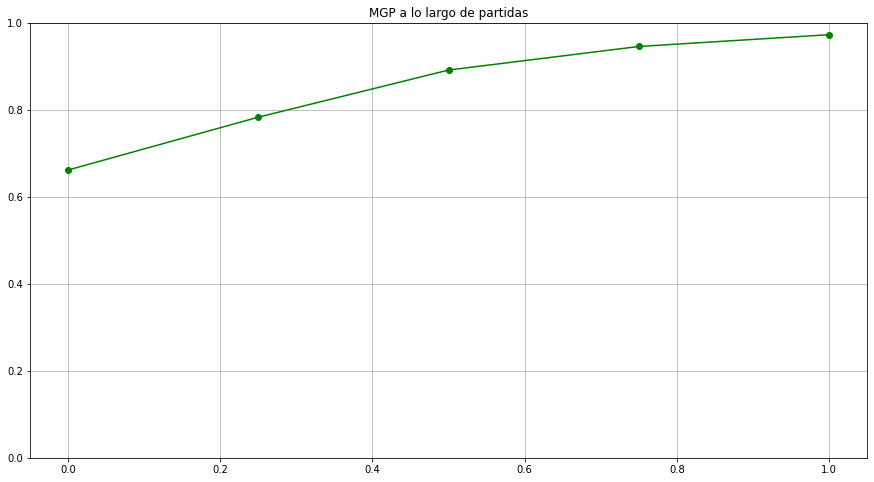

In [8]:
y = resultsFiltered
x = np.linspace(0, 1, resultsFiltered.size)
plt.plot(x, y, 'go-',scalex=True, scaley=False, label='MGP')
plt.grid()
plt.title('MGP a lo largo de partidas')
plt.show()

Algunas observaciones sobre este sistema de MGP
El calculo se comporta de forma similar al marco teorico planteado.
Los incrementos y decrementos maximos siempre son un 50% del valor actual, suponiendo que el paciente
realiza un juego perfecto/completamente erroneo.